In [1]:
import pandafdxs as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup

In [2]:
df = pd.read_csv('campaign_description_data.csv')
df.head()

,charity_name,campaign_name,detailedStory
0,Singapore Red Cross Society,You're The Difference Between An Empty Stomach...,"<p class=""ql-align-justify""><strong><em>“The m..."
1,Singapore Red Cross Society,SCDF OPERATION LIONHEART PRESENTS: THE LIFE-SA...,"<p><span style=""background-color: transparent;..."
2,Singapore Red Cross Society,Box It Forward with DHL,"<p class=""ql-align-justify"">DHL, Ten Square, S..."
3,Singapore Red Cross Society,Together for Humanity - Grateful Hearts Day 2024,"<p><span style=""color: rgb(60, 64, 72);"">Singa..."
4,Singapore Red Cross Society,International Bazaar 2023 - One World United i...,"<p>Join us to eat, play, shop for a good cause..."


In [ ]:
#Cleaning of campaign_description attribute

# Load CSV file
file_path = 'campaign_description_data.csv' 
data = pd.read_csv(file_path)

# Function to remove HTML tags from a string
def clean_html(raw_html):
    soup = BeautifulSoup(raw_html, 'html.parser')
    return soup.get_text()

# Clean the 'campaign_description' column and replace it with the cleaned version
data['campaign_description'] = data['detailedStory'].apply(clean_html)

# Drop the 'detailedStory' column if it exists
if 'detailedStory' in data.columns:
    data = data.drop('detailedStory', axis=1)

# Display the updated dataframe
print(data)

# Optionally, save the cleaned and updated dataframe to a new CSV file
data.to_csv('cleaned_campaign_description_data.csv', index=False)

In [3]:
df1 = pd.read_csv('cleaned_campaign_description_data.csv')
df1.head()

,charity_name,campaign_name,campaign_description
0,Singapore Red Cross Society,You're The Difference Between An Empty Stomach...,“The monthly FoodAid worth $250 from the Singa...
1,Singapore Red Cross Society,SCDF OPERATION LIONHEART PRESENTS: THE LIFE-SA...,"Superman, Batman, Spider-Man – every superhero..."
2,Singapore Red Cross Society,Box It Forward with DHL,"DHL, Ten Square, Singapore Red Cross and Mini ..."
3,Singapore Red Cross Society,Together for Humanity - Grateful Hearts Day 2024,Singapore Red Cross is organising Grateful Hea...
4,Singapore Red Cross Society,International Bazaar 2023 - One World United i...,"Join us to eat, play, shop for a good cause!Th..."


In [4]:
# !pip3 install pytextrank
# !pip install keybert
# !pip3 install spacy
# !python -m spacy download en_core_web_sm
# !pip3 install wordcloud
# !pip3 install yake
# !pip3 install monkeylearn
# !pip3 install textrazor

In [9]:
#Spacy 

import spacy
from collections import Counter
from string import punctuation

# Load Spacy's English language model
nlp = spacy.load("en_core_web_sm")

# Define a function to extract keywords (hotwords)
def get_hotwords(text):
    result = []
    pos_tag = ['PROPN', 'ADJ', 'NOUN']  # Only consider proper nouns, adjectives, and nouns
    doc = nlp(text.lower())  # Process the text
    for token in doc:
        if(token.text in nlp.Defaults.stop_words or token.text in punctuation):
            continue
        if(token.pos_ in pos_tag):
            result.append(token.text)
    return result

# Load the cleaned campaign description CSV file
file_path = 'cleaned_campaign_description_data.csv'  
data_cleaned = pd.read_csv(file_path)

# Combine all the cleaned campaign descriptions into one large string for keyword extraction
all_descriptions = " ".join(data_cleaned['campaign_description'].astype(str))

# Extract keywords from the combined text
keywords = get_hotwords(all_descriptions)

# Count the most common keywords
most_common_keywords = Counter(keywords).most_common(10)

# Display the top 10 most common keywords
print("Top 10 Keywords:")
for item in most_common_keywords:
    print(f"Keyword: {item[0]}, Frequency: {item[1]}")

Top 10 Keywords:
Keyword: donation, Frequency: 720
Keyword: singapore, Frequency: 547
Keyword: support, Frequency: 500
Keyword: children, Frequency: 353
Keyword: community, Frequency: 282
Keyword: tax, Frequency: 265
Keyword: charity, Frequency: 259
Keyword: years, Frequency: 241
Keyword: campaign, Frequency: 239
Keyword: year, Frequency: 239


In [ ]:
#!python -m pip uninstall pytextrank --yes
#!pip install pytextrank
#!pip install spacy
#!python -m spacy download en_core_web_sm

In [ ]:
#Textrank

import pytextrank

# Load Spacy's English language model
nlp = spacy.load("en_core_web_sm")

# Add PyTextRank to the Spacy pipeline
nlp.add_pipe("textrank")

# Load the cleaned campaign description CSV file
file_path = 'cleaned_campaign_description_data.csv'  
data_cleaned = pd.read_csv(file_path)

# Combine all the cleaned campaign descriptions into one large string for TextRank processing
all_descriptions = " ".join(data_cleaned['campaign_description'].astype(str))

# Apply the Spacy pipeline with TextRank to the combined text
doc = nlp(all_descriptions)

# Extract and display the top-ranked phrases using TextRank
print("Top 10 Ranked Phrases:")
for phrase in doc._.phrases[:10]:
    print(f"Phrase: {phrase.text}, Rank: {phrase.rank:.4f}, Count: {phrase.count}")

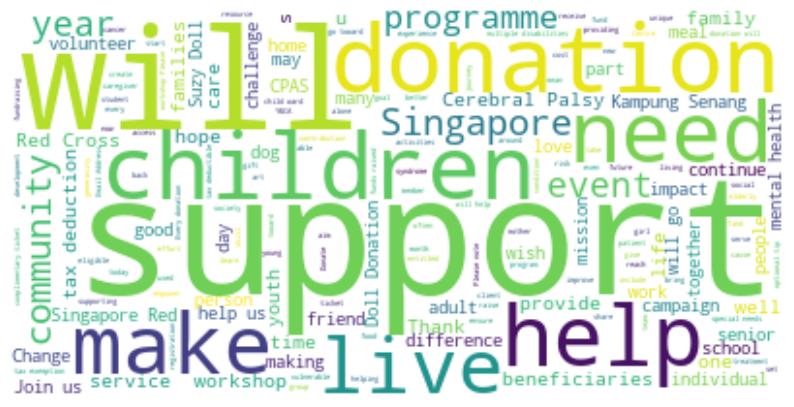

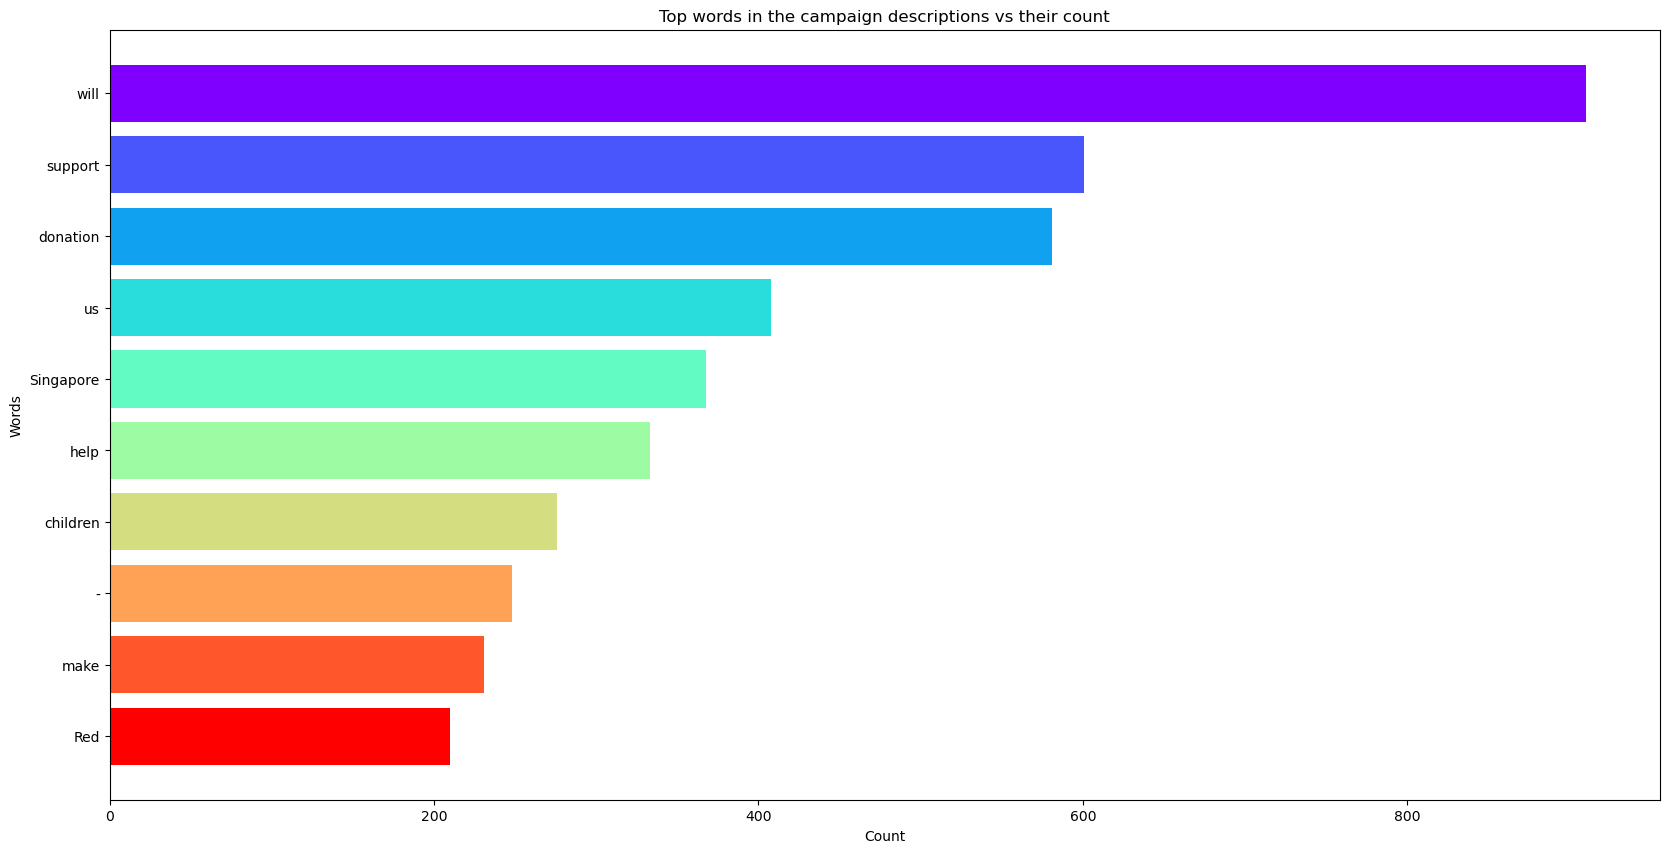

In [6]:
#WordCloud

from wordcloud import WordCloud, STOPWORDS
from matplotlib import rcParams
import collections
import numpy as np
import matplotlib.cm as cm

# Load the cleaned campaign description CSV file
file_path = 'cleaned_campaign_description_data.csv'  
data_cleaned = pd.read_csv(file_path)

# Combine all the cleaned campaign descriptions into one large string for word cloud generation
all_descriptions = " ".join(data_cleaned['campaign_description'].astype(str))

# Define stopwords
stopwords = STOPWORDS

# Generate the word cloud
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=1000).generate(all_descriptions)

# Display the word cloud
rcParams['figure.figsize'] = 10, 20
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Extract and count the most common words
filtered_words = [word for word in all_descriptions.split() if word.lower() not in stopwords]
counted_words = collections.Counter(filtered_words)

# Get top 10 words
words = []
counts = []
for letter, count in counted_words.most_common(10):
    words.append(letter)
    counts.append(count)

# Set up colors for the bar chart
colors = cm.rainbow(np.linspace(0, 1, 10))

# Plot the top 10 words
rcParams['figure.figsize'] = 20, 10
plt.title('Top words in the campaign descriptions vs their count')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(words, counts, color=colors)
plt.gca().invert_yaxis()
plt.show()

In [ ]:
#KeyBert

from keybert import KeyBERT

# Load the cleaned campaign description CSV file
file_path = 'cleaned_campaign_description_data.csv'  
data_cleaned = pd.read_csv(file_path)

# Combine all the cleaned campaign descriptions into one large string for keyword extraction
all_descriptions = " ".join(data_cleaned['campaign_description'].astype(str))

# Initialize KeyBERT model
kw_model = KeyBERT()

# Extract keywords from the combined text
keywords = kw_model.extract_keywords(all_descriptions, keyphrase_ngram_range=(1, 2), stop_words='english', top_n=10)

# Print the top 10 keywords
print("Top 10 Keywords from Campaign Descriptions:")
for keyword, score in keywords:
    print(f"Keyword: {keyword}, Score: {score:.4f}")

In [10]:
#Yake

import yake

# Load the cleaned campaign description CSV file
file_path = 'cleaned_campaign_description_data.csv'
data_cleaned = pd.read_csv(file_path)

# Combine all the cleaned campaign descriptions into one large string for keyword extraction
all_descriptions = " ".join(data_cleaned['campaign_description'].astype(str))

# Initialize Yake keyword extractor
kw_extractor = yake.KeywordExtractor()

# Extract keywords from the combined text
keywords = kw_extractor.extract_keywords(all_descriptions)

# Print the top keywords
print("Top Keywords from Campaign Descriptions:")
for kw, score in keywords:
    print(f"Keyword: {kw}, Score: {score:}")

Top Keywords from Campaign Descriptions:
Keyword: Singapore Red Cross, Score: 3.862156692373429e-07
Keyword: Suzy Doll Donation, Score: 2.3602396134689423e-06
Keyword: Red Cross Home, Score: 5.002205385928151e-06
Keyword: Singapore Red, Score: 6.922948640581522e-06
Keyword: Red Cross Singapore, Score: 8.496744723221545e-06
Keyword: Red Cross, Score: 1.0754880572686263e-05
Keyword: Palsy Alliance Singapore, Score: 1.6283379524004593e-05
Keyword: Kampung Senang Charity, Score: 1.953926926593583e-05
Keyword: World Cerebral Palsy, Score: 2.3284367610604283e-05
Keyword: cerebral palsy, Score: 3.1034484896258374e-05
Keyword: Cerebral Palsy Month, Score: 3.311035655050527e-05
Keyword: Singapore, Score: 3.889483044884026e-05
Keyword: Doll donation box, Score: 4.930812662231881e-05
Keyword: Suzy Doll, Score: 5.0085424261913374e-05
Keyword: Doll Donation, Score: 5.2641831332718925e-05
Keyword: Donation BoxRemember Suzy, Score: 5.330040950913423e-05
Keyword: donation, Score: 6.190429679487105e-05